        Data Science: A Programming Approach
        Mahyar S Vaghefi
        University of Texas Arlington
        
        This document can only be used for class studies. 
        You are not allowed to share it in any public platform.

<h1 align='center' style="color: blue;">Group Project - Fall 2021</h1>

You need to work as a team for this project. Your job is to develop a predictive model that can predict whether or not a movie is a <i>Comedy</i>. In order to do so you need to use the textual features of the movie stories and creat your predictive models. There are totally three different files in this project.

<ol>
    <li><b>movie_story_student_file.csv</b>: This file contains the movie stories that should be used by students for model development.</li>
    <li><b>movie_story_evaluation_file.csv</b>: This file should NOT be used for model development purposes. Students should only use this file after developing their predictive models and selecting their best final model. They then need to use their best predictive model and predict whether or not the movies in <b>movie story evaluation file.csv</b> are Comedy.</li>
    <li><b>movies.csv</b>: This file contain the movie genres.</li>
</ol>

<b>Additional Note:</b> This note provides additional guideline for the project.

<b>Step 1:</b> Explore all files to become familiar with the dataset <br />
<b>Step 2:</b> There are 20,000 movies in `movie_story_student_file.csv`file. Use the `movies.csv` file to determine whether a movie is Comedy or not. The final output of this step should be development of a dataframe file that contains three columns: 1) movieId, 2) story, 3) ComedyGenre. The value for the thirrd column should be in a binary format. If the movie is comedy the value should be 1, otherwise 0. Name the new file as `main_dataset`. <br />
<b>Step 3:</b> If you want to just have one train and one test set, then split the `main_dataset` to train and test sets. Otherwise you can use cross validation methods.  <br />
<b>Step 4:</b> Use your supervised learning and text analysis knowledge to develope different predictive models (i.e. logestic regression, random forest, ...). Test the performance of your models in terms of accuracy, precision, recall, and F1 scores. <br />
<b>Step 5:</b> Choose one of your best models (only one). Then use the full data available in `main dataset` to train that model.<br />
<b>Step 6:</b> Prepare data in `movie_story_evaluation_file.csv` for prediction. You need to perform the exact same steps that you have done in <b>Step 2</b> to prepare this new dataset. Name the new dataset as `evaluation_dataset`. <br />
<b>Step 7:</b> Use your selected model in Step 5 to predict whether or not movies in `evaluation_dataset` are Comedy movies. <br />
<b>Step 8:</b> Report the final accuracy, precision, recall and F1 score. <br />

Keep in mind that the above steps are only provide guidelines. There are more detail works in this project that should be identified by students. 

In [23]:
import pandas as pd

In [24]:
#Step 2
story_movie_data = pd.read_csv("movie_story_student_file.csv")
genre_movie = pd.read_csv("movies.csv")

In [25]:
merge_set = pd.merge(story_movie_data, genre_movie, left_on ='movie_id', right_on='movieId').drop('movieId', axis = 1).drop('title', axis = 1)
merge_set.isnull().any()


movie_id    False
story       False
genres      False
dtype: bool

In [26]:
new_data = merge_set['genres'].str.contains("Comedy").map({False:0,True:1})
merge_set['ComedyGenre'] = new_data

#main_dataset = merge_set.rename(columns={"story": "story", "movieId": "movieId","genres":"ComedyGenre"})  

In [27]:
merge_set.pop('genres')
main_dataset = merge_set.copy()

In [28]:
main_dataset

,movie_id,story,ComedyGenre
0,131072,A girl who always tends to fall in love with t...,1
1,196609,"Bigfoot has come to the town of Ellwood City, ...",1
2,131074,"At an altitude of 18,000 feet, Alaska\'s Mount...",0
3,196611,"In her first special since 2003, Ellen revisit...",1
4,196613,Mike and Sulley are back at Monsters Universit...,1
...,...,...,...
19995,56801,The iconic creatures from two of the scariest ...,0
19996,122337,When a bored-with-life English teacher meets a...,0
19997,187875,Herbert Blount is a crowdfunding contributor f...,0
19998,187873,REAL BOY is the coming-of-age story of Bennett...,0


In [29]:
count=[]
c=0
for i in range(len(main_dataset)):
    if main_dataset.ComedyGenre[i] == 1:
        count.append(i)
        c=c+1
c

5266

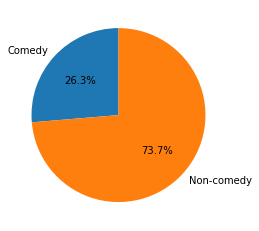

In [30]:
import matplotlib.pyplot as plt
nc = 20000-c
vals = [c, nc]
label = ['Comedy','Non-comedy']
inds=range(len(vals))
plt.pie(vals, labels= label, startangle=90, autopct='%1.1f%%') 
plt.show()

In [31]:
main_dataset.to_csv('main_dataset.csv',index=False,)

In [32]:
main_dataset = pd.read_csv('main_dataset.csv')

In [33]:
# Converting to lower case
main_dataset['story'] = main_dataset['story'].apply(lambda x: " ".join(x.lower() for x in x.split()))
main_dataset['story'].head()

0    a girl who always tends to fall in love with t...
1    bigfoot has come to the town of ellwood city, ...
2    at an altitude of 18,000 feet, alaska\'s mount...
3    in her first special since 2003, ellen revisit...
4    mike and sulley are back at monsters universit...
Name: story, dtype: object

In [34]:
# Removing Special characters
main_dataset['story'] = main_dataset['story'].str.replace('[^\w\s]','')
main_dataset['story'].head()

0    a girl who always tends to fall in love with t...
1    bigfoot has come to the town of ellwood city p...
2    at an altitude of 18000 feet alaskas mount st ...
3    in her first special since 2003 ellen revisits...
4    mike and sulley are back at monsters universit...
Name: story, dtype: object

In [ ]:
import nltk
nltk.download('stopwords')

In [35]:
# Removing Stop words

from nltk.corpus import stopwords
stop = stopwords.words('english')
main_dataset['story']  = main_dataset['story'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
main_dataset['story'] .head()

0    girl always tends fall love wrong guy meets on...
1    bigfoot come town ellwood city pa causing big ...
2    altitude 18000 feet alaskas mount st elias des...
3    first special since 2003 ellen revisits road s...
4    mike sulley back monsters university funfilled...
Name: story, dtype: object

In [36]:
# Stemming
from nltk.stem import PorterStemmer
st = PorterStemmer()
main_dataset['story'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    girl alway tend fall love wrong guy meet one b...
1    bigfoot come town ellwood citi pa caus big pro...
2    altitud 18000 feet alaska mount st elia destin...
3    first special sinc 2003 ellen revisit road sta...
4    mike sulley back monster univers funfil weeken...
Name: story, dtype: object

In [ ]:
pip install textblob

In [37]:
#lemmitizing
from textblob import Word
main_dataset['story'] = main_dataset['story'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
main_dataset['story'].head()

0    girl always tends fall love wrong guy meet one...
1    bigfoot come town ellwood city pa causing big ...
2    altitude 18000 foot alaska mount st elia desti...
3    first special since 2003 ellen revisits road s...
4    mike sulley back monster university funfilled ...
Name: story, dtype: object

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(ngram_range=(1,3), min_df = 10)
X = vect.fit_transform(main_dataset['story'])
df1 = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())

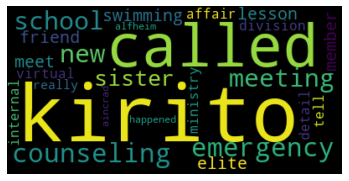

In [51]:
from wordcloud import WordCloud, ImageColorGenerator

for i in range(len(count)):
    wordcloud = WordCloud().generate(main_dataset.story[i])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off");

### Embedding

In [ ]:
# text = main_dataset.story

In [ ]:
# import numpy as np
# embeddings_index = dict()
# f = open('glove.6B.50d.txt',encoding ="utf-8")
# for line in f:
#     values = line.split()
#     word = values[0]
#     coefs = np.asarray(values[1:], dtype='float32')
#     embeddings_index[word] = coefs
# f.close()

In [ ]:
# import numpy as np
# from nltk import word_tokenize
# from tqdm import tqdm
# embeddings = []
# for des in tqdm(text):
#     des = des.encode().decode("utf-8")
#     base_embedding = np.zeros((50,))
#     word_count = 0
#     for token in word_tokenize(des):
#         token = token.lower()
#         if token in stopwords.words('english'):
#             continue
#         try:
#             base_embedding += embeddings_index[token]
#             word_count +=1
#         except:
#             continue
#     base_embedding = base_embedding/word_count
#     embeddings.append(base_embedding)

In [ ]:
# embeddings

In [ ]:
# X = np.array(embeddings)
# X.shape

In [ ]:
# X

### Model building 

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, main_dataset['ComedyGenre'], test_size=0.3,random_state=0)
model.fit(X_train, y_train)
y_test_hat = model.predict(X_test)
round(accuracy_score(y_test,y_test_hat) * 100,2)

78.65

In [50]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0)
model.fit(X_train,y_train)
y_train = model.predict(X_train)
y_test_hat1 = model.predict(X_test)
print(round(accuracy_score(y_train,y_train) * 100,2))
print(round(accuracy_score(y_test,y_test_hat1) * 100,2))

100.0
76.98


In [52]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(solver='lbfgs',random_state=0, max_iter=5000, 
                      hidden_layer_sizes=[25,10])
model.fit(X_train,y_train)
y_test_hat2 = model.predict(X_test)
round(accuracy_score(y_test,y_test_hat2) * 100,2)

74.35

In [53]:
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(X_train,y_train)
y_test_hat3 = model.predict(X_test)
round(accuracy_score(y_test,y_test_hat3) * 100,2)

77.92

In [54]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV


model = DecisionTreeClassifier()
model.fit(X_train,y_train)

y_train_hat = model.predict(X_train)
y_test_hat4 = model.predict(X_test)

in_sample_Accuracy = accuracy_score(y_train, y_train_hat, normalize = True ) * 100
out_sample_Accuracy = accuracy_score(y_test, y_test_hat4, normalize=True) * 100

model = DecisionTreeClassifier()

param_grid = {'max_depth': [3,4,5,6,7]}
cv = StratifiedKFold(n_splits = 5, random_state=0, shuffle=True)
grid = GridSearchCV(model, param_grid, cv = cv, return_train_score=True, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameter: {}".format(grid.best_params_))
print("Best Cross Validation Score: {}".format(grid.best_score_))

Best Parameter: {'max_depth': 6}
Best Cross Validation Score: 0.7588571428571429


In [55]:
from sklearn.metrics import classification_report

print('Logistic Regression')
print(classification_report(y_test,y_test_hat))
print('Random Forest')
print(classification_report(y_test,y_test_hat1))
print('Support Vector machine')
print(classification_report(y_test,y_test_hat3))
print('MLPClassifier')
print(classification_report(y_test,y_test_hat2))
print('Decision Tree')
print(classification_report(y_test,y_test_hat4))


Logistic Regression
              precision    recall  f1-score   support

           0       0.79      0.96      0.87      4420
           1       0.74      0.29      0.42      1580

    accuracy                           0.79      6000
   macro avg       0.77      0.63      0.64      6000
weighted avg       0.78      0.79      0.75      6000

Random Forest
              precision    recall  f1-score   support

           0       0.77      0.98      0.86      4420
           1       0.74      0.19      0.31      1580

    accuracy                           0.77      6000
   macro avg       0.76      0.58      0.58      6000
weighted avg       0.76      0.77      0.72      6000

Support Vector machine
              precision    recall  f1-score   support

           0       0.78      0.98      0.87      4420
           1       0.78      0.23      0.35      1580

    accuracy                           0.78      6000
   macro avg       0.78      0.60      0.61      6000
weighted avg     

### Model Selection : 

In [56]:
#Running Logistic Regression on entire dataset
model = LogisticRegression(max_iter=300)
X_train = X
y_train = main_dataset['ComedyGenre']
model.fit(X_train, y_train)

LogisticRegression(max_iter=300)

### Working on evaluation data

In [83]:
story_movie_eval_data = pd.read_csv("movie_story_evaluation_file.csv")
merge_set_2 = pd.merge(story_movie_eval_data, genre_movie, left_on ='movie_id', right_on='movieId').drop('movieId', axis = 1).drop('title', axis = 1)
merge_set_2.isnull().any()

movie_id    False
story       False
genres      False
dtype: bool

In [84]:
merge_set_2

,movie_id,story,genres
0,122349,Growing up in the Mission district of San Fran...,Drama
1,122351,A soldier returns home from the Iraq war only ...,Horror|Thriller
2,122361,Marco the Monkey works as a beach officer. But...,Animation|Children|Comedy
3,187901,"When an honest cop, Vijay Kumar\'s family is r...",Action|Romance
4,187903,"Kathiresan aka Kaththi, a criminal, escapes fr...",Action|Drama|Romance
...,...,...,...
3493,131062,"In the middle of nowhere, 20 years after an ap...",Drama|Fantasy|Sci-Fi
3494,131064,After living for years as a struggling artist ...,Comedy
3495,131066,Ronal is a young barbarian with low self-estee...,Adventure|Animation|Fantasy
3496,131068,"Ziege, H\xc3\xa4schen and Max have now moved t...",Comedy


In [85]:
new_data_2 = merge_set_2['genres'].str.contains("Comedy").map({False:0,True:1})
merge_set_2['ComedyGenre'] = new_data_2

In [86]:
merge_set_2.pop('genres')
evaluation_dataset = merge_set_2.copy()

In [87]:
evaluation_dataset.to_csv('evaluation_dataset.csv',index=False,)

In [88]:
evaluation_dataset = pd.read_csv('evaluation_dataset.csv')

In [90]:
evaluation_dataset

,movie_id,story,ComedyGenre
0,122349,Growing up in the Mission district of San Fran...,0
1,122351,A soldier returns home from the Iraq war only ...,0
2,122361,Marco the Monkey works as a beach officer. But...,1
3,187901,"When an honest cop, Vijay Kumar\'s family is r...",0
4,187903,"Kathiresan aka Kaththi, a criminal, escapes fr...",0
...,...,...,...
3493,131062,"In the middle of nowhere, 20 years after an ap...",0
3494,131064,After living for years as a struggling artist ...,1
3495,131066,Ronal is a young barbarian with low self-estee...,0
3496,131068,"Ziege, H\xc3\xa4schen and Max have now moved t...",1


In [91]:
# Converting to lower case
evaluation_dataset['story'] = evaluation_dataset['story'].apply(lambda x: " ".join(x.lower() for x in x.split()))
evaluation_dataset['story'].head()

0    growing up in the mission district of san fran...
1    a soldier returns home from the iraq war only ...
2    marco the monkey works as a beach officer. but...
3    when an honest cop, vijay kumar\'s family is r...
4    kathiresan aka kaththi, a criminal, escapes fr...
Name: story, dtype: object

In [92]:
# Removing Special characters

evaluation_dataset['story'] = evaluation_dataset['story'].str.replace('[^\w\s]','')
evaluation_dataset['story'].head()

0    growing up in the mission district of san fran...
1    a soldier returns home from the iraq war only ...
2    marco the monkey works as a beach officer but ...
3    when an honest cop vijay kumars family is ruth...
4    kathiresan aka kaththi a criminal escapes from...
Name: story, dtype: object

In [93]:
# Removing Stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')
evaluation_dataset['story']  = evaluation_dataset['story'] .apply(lambda x: " ".join(x for x in x.split() if x not in stop))
evaluation_dataset['story'] .head()

0    growing mission district san francisco che riv...
1    soldier returns home iraq war haunted visions ...
2    marco monkey works beach officer spends time t...
3    honest cop vijay kumars family ruthlessly slau...
4    kathiresan aka kaththi criminal escapes kolkat...
Name: story, dtype: object

In [94]:
# Stemming
from nltk.stem import PorterStemmer
st = PorterStemmer()
evaluation_dataset['story'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    grow mission district san francisco che rivera...
1       soldier return home iraq war haunt vision dead
2    marco monkey work beach offic spend time tri w...
3    honest cop vijay kumar famili ruthlessli slaug...
4    kathiresan aka kaththi crimin escap kolkata pr...
Name: story, dtype: object

In [104]:
#Lemmitizing
from textblob import Word
evaluation_dataset['story'] =evaluation_dataset['story'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
x = evaluation_dataset['story']
x[2]

'marco monkey work beach officer spends time trying win heart beautiful lulu succeed marcos rival carlo build gigantic monkeyshaped casino right marcos beach lulu fascinated charming carlo jealously marco start undercover investigation carlos strange casino soon discovers truth carlo take island force lulu marry marco try arrest carlo problem rise literally ground carlos casino giant robot'

In [96]:
# Applying TfidVectorizer 

from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(ngram_range=(1,3),min_df = 10)
X = vect.fit_transform(evaluation_dataset['story'])
pd.DataFrame(X.toarray(), columns=vect.get_feature_names())

,10,10 year,12,12yearold,14,15,18,1950s,1960s,1970s,...,young,young boy,young couple,young girl,young man,young men,young woman,younger,youth,zombie
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.092597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
count_eval=[]
b=0
for i in range(len(evaluation_dataset)):
    if evaluation_dataset.ComedyGenre[i] == 1:
        count_eval.append(i)
        b=b+1
b

875

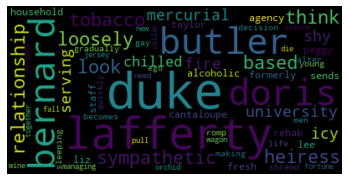

In [98]:
for i in range(len(count_eval)):
    wordcloud = WordCloud().generate(evaluation_dataset.story[i])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off");

In [99]:
model = LogisticRegression(max_iter=300)
X_train, X_test, y_train, y_test = train_test_split(X, evaluation_dataset['ComedyGenre'], test_size=0.3,random_state=0)
model.fit(X_train, y_train)
y_test_hat = model.predict(X_test)
round(accuracy_score(y_test,y_test_hat) * 100,2)

78.0

In [100]:
X_test

<1050x1944 sparse matrix of type '<class 'numpy.float64'>'
	with 19391 stored elements in Compressed Sparse Row format>

In [101]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
cf_matrix = confusion_matrix(y_test,y_test_hat)
print(cf_matrix)

Confusion Matrix
[[788   5]
 [226  31]]


In [102]:
from sklearn.metrics import classification_report
print('Logistic Regression')
print(classification_report(y_test,y_test_hat))

Logistic Regression
              precision    recall  f1-score   support

           0       0.78      0.99      0.87       793
           1       0.86      0.12      0.21       257

    accuracy                           0.78      1050
   macro avg       0.82      0.56      0.54      1050
weighted avg       0.80      0.78      0.71      1050



<b>Extra Credit</b> The group with the best prediction model is going to get extra points.

### Output

<ul>
    <li>Make sure to put descriptive comments on your code</li>
    <li>Use the markdown cell format in Jupiter to add your own interpretation to the result in each section.</li>
    <li>Make sure to keep the output of your runs when you want to save the final version of the file.</li>
    <li>The final submited file should be very well structured and should have a consistent flow of analysis.</li>
    <li>You may want to use an additional word document to report the result of your analysis</li>
</ul>

#### Due Date: Dec 6 2021 at 6:59 PM

<table style="width:400px;height:200px;border:1px black solid; background-color:white">
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Comprehensiveness</th>
        <td style="text-align:center;border:1px black solid"><b>30%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Correctness</th>
        <td style="text-align:center;border:1px black solid"><b>30%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Complete Report</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Clear Code</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:center;border:1px black solid;color:red"><u>Total</u></th>
        <td style="text-align:center;border:1px black solid;color:red"><b stlyle="color:red">100%</b></td>
    </tr>
</table>